In [9]:
from sqlalchemy import create_engine
import api_keys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
DB_USER = api_keys.DB_USER
DB_PASS = api_keys.DB_PASS
DB_URL = api_keys.DB_URL

engine = create_engine("mysql+pymysql://{0}:{1}@{2}".format(DB_USER, DB_PASS, DB_URL), echo=True) 
connection = engine.connect()

statement = """SELECT * FROM dublin_bikes.weather_current
                    order by time_queried desc
                    limit 109;""" # create select statement for stations table

2021-03-20 14:21:42,170 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2021-03-20 14:21:42,181 INFO sqlalchemy.engine.base.Engine {}
2021-03-20 14:21:42,300 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2021-03-20 14:21:42,300 INFO sqlalchemy.engine.base.Engine {}
2021-03-20 14:21:42,533 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2021-03-20 14:21:42,548 INFO sqlalchemy.engine.base.Engine {}
2021-03-20 14:21:42,781 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8mb4' and `Collation` = 'utf8mb4_bin'
2021-03-20 14:21:42,781 INFO sqlalchemy.engine.base.Engine {}
2021-03-20 14:21:42,903 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2021-03-20 14:21:42,903 INFO sqlalchemy.engine.base.Engine {}
2021-03-20 14:21:43,034 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2021-03-20 14:21:43,034 INFO sqlalchemy.engine.base.E

In [49]:
df = pd.read_sql_query(statement, engine) # https://stackoverflow.com/questions/29525808/sqlalchemy-orm-conversion-to-pandas-dataframe

2021-03-20 14:21:44,789 INFO sqlalchemy.engine.base.Engine SELECT * FROM dublin_bikes.weather_current
                    order by time_queried desc
                    limit 109;
2021-03-20 14:21:44,789 INFO sqlalchemy.engine.base.Engine {}


In [50]:
df.shape

(109, 12)

In [51]:
df.head(5)

,station_number,time_queried,last_update,temp,feels_like,pressure,humidity,visibility,wind_speed,wind_deg,weather_main,weather_description
0,92,2021-03-20 14:19:47,2021-03-20 14:19:37,285,281,1033,None,10000,5,300,Clouds,broken clouds
1,88,2021-03-20 14:19:47,2021-03-20 14:19:44,285,281,1033,None,10000,5,300,Clouds,broken clouds
2,21,2021-03-20 14:19:47,2021-03-20 14:19:35,285,281,1033,None,10000,5,300,Clouds,broken clouds
3,39,2021-03-20 14:19:47,2021-03-20 14:19:39,285,281,1033,None,10000,5,300,Clouds,broken clouds
4,83,2021-03-20 14:19:47,2021-03-20 14:19:41,285,281,1033,None,10000,5,300,Clouds,broken clouds


In [52]:
df.tail(5)

,station_number,time_queried,last_update,temp,feels_like,pressure,humidity,visibility,wind_speed,wind_deg,weather_main,weather_description
104,56,2021-03-20 14:19:34,2021-03-20 14:19:34,285,281,1033,None,10000,5,300,Clouds,broken clouds
105,108,2021-03-20 14:19:34,2021-03-20 14:19:33,285,281,1033,None,10000,5,300,Clouds,broken clouds
106,54,2021-03-20 14:19:33,2021-03-20 14:19:10,285,281,1033,None,10000,5,300,Clouds,broken clouds
107,42,2021-03-20 14:19:33,2021-03-20 14:19:32,285,281,1033,None,10000,5,300,Clouds,broken clouds
108,30,2021-03-20 14:19:33,2021-03-20 14:19:33,285,281,1033,None,10000,5,300,Clouds,broken clouds


In [ ]:
# the following notebook is based off material presented in Data Analytics module COMP47350 labs 7 and 9

In [53]:
df.dtypes

station_number                  int64
time_queried           datetime64[ns]
last_update            datetime64[ns]
temp                            int64
feels_like                      int64
pressure                        int64
humidity                       object
visibility                      int64
wind_speed                      int64
wind_deg                        int64
weather_main                   object
weather_description            object
dtype: object

In [54]:
df["humidity"].fillna(0)

0      0
1      0
2      0
3      0
4      0
      ..
104    0
105    0
106    0
107    0
108    0
Name: humidity, Length: 109, dtype: int64

In [55]:
categorical_columns = df[['station_number','weather_main', 'weather_description']].columns
# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category') 
df["humidity"] = df["humidity"].fillna(0)
df["humidity"] = df["humidity"].astype('int64')  
continuous_columns = df.select_dtypes(['int64']).columns
datetime_columns = df.select_dtypes(['datetime64[ns]']).columns

df.dtypes

station_number               category
time_queried           datetime64[ns]
last_update            datetime64[ns]
temp                            int64
feels_like                      int64
pressure                        int64
humidity                        int64
visibility                      int64
wind_speed                      int64
wind_deg                        int64
weather_main                 category
weather_description          category
dtype: object

In [56]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate rows (including first) in the table is: 0


In [57]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


# no duplicate rows or columns

In [58]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
station_number,109,109,117,1
weather_main,109,1,Clouds,109
weather_description,109,1,broken clouds,109


# station_status is constant column

In [59]:
df.select_dtypes(include=['int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
temp,109.0,285.0,0.0,285.0,285.0,285.0,285.0,285.0
feels_like,109.0,281.0,0.0,281.0,281.0,281.0,281.0,281.0
pressure,109.0,1033.0,0.0,1033.0,1033.0,1033.0,1033.0,1033.0
humidity,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
visibility,109.0,10000.0,0.0,10000.0,10000.0,10000.0,10000.0,10000.0
wind_speed,109.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
wind_deg,109.0,300.0,0.0,300.0,300.0,300.0,300.0,300.0


In [60]:
df.select_dtypes(include=['datetime64[ns]']).describe().T

,count,unique,top,freq,first,last
time_queried,109,15,2021-03-20 14:19:46,18,2021-03-20 14:19:33,2021-03-20 14:19:47
last_update,109,13,2021-03-20 14:19:33,15,2021-03-20 14:19:10,2021-03-20 14:19:44


In [61]:
df.isnull().sum()

station_number         0
time_queried           0
last_update            0
temp                   0
feels_like             0
pressure               0
humidity               0
visibility             0
wind_speed             0
wind_deg               0
weather_main           0
weather_description    0
dtype: int64

# logical integrity

In [62]:
test_1 = df[['time_queried','last_update']][df['time_queried']<df['last_update']]
print("Number of rows failing the test: ", test_1.shape[0])
test_1.head(5)

Number of rows failing the test:  0


,time_queried,last_update


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000152D55C4CA0>,
      dtype=object)

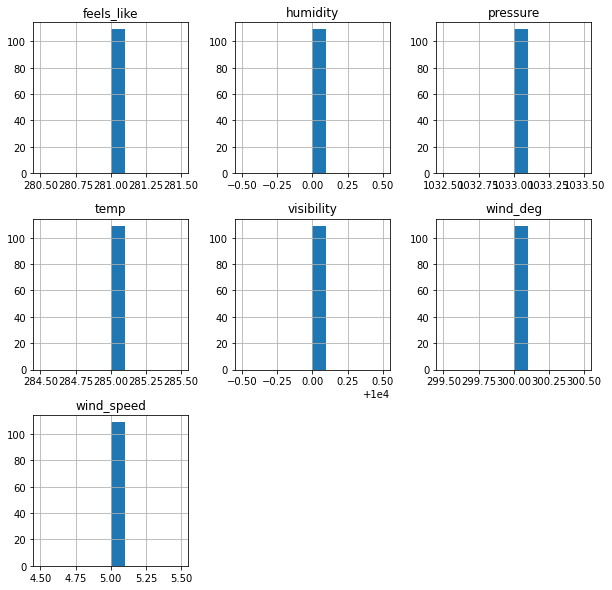

In [63]:
df[continuous_columns].hist(layout=(3, 3), figsize=(10,10), bins=10)

temp             AxesSubplot(0.125,0.657941;0.227941x0.222059)
feels_like    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
pressure      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
humidity         AxesSubplot(0.125,0.391471;0.227941x0.222059)
visibility    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
wind_speed    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
wind_deg            AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

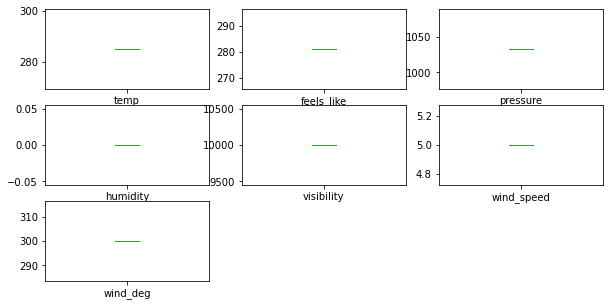

In [64]:
df[continuous_columns].plot(kind='box', subplots=True, figsize=(10,5), layout=(3,3), sharex=False, sharey=False)

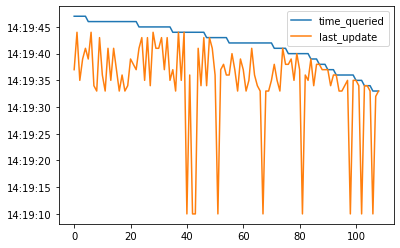

In [65]:
df[datetime_columns].plot()

time_queried


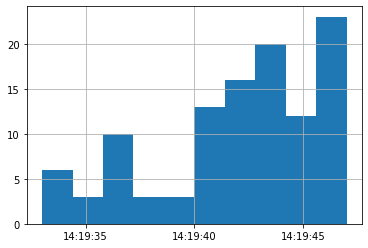

In [66]:
print(datetime_columns[0])
df[datetime_columns[0]].hist()

last_update


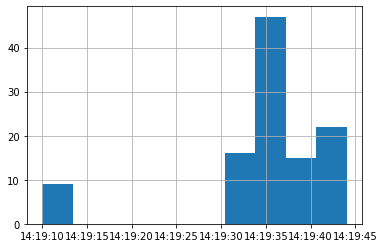

In [67]:
print(datetime_columns[1])
df[datetime_columns[1]].hist()

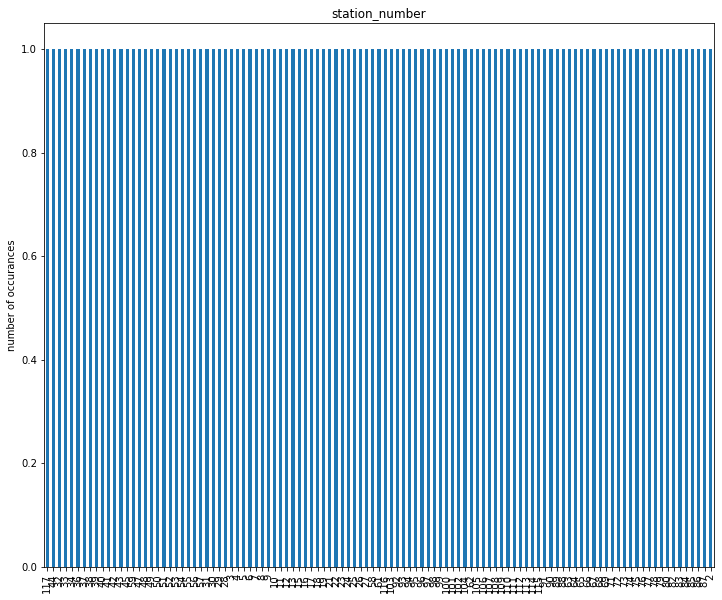

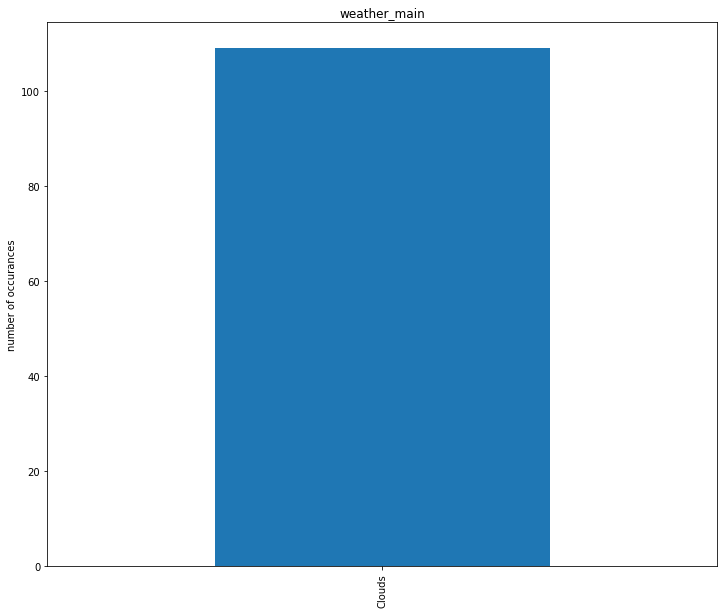

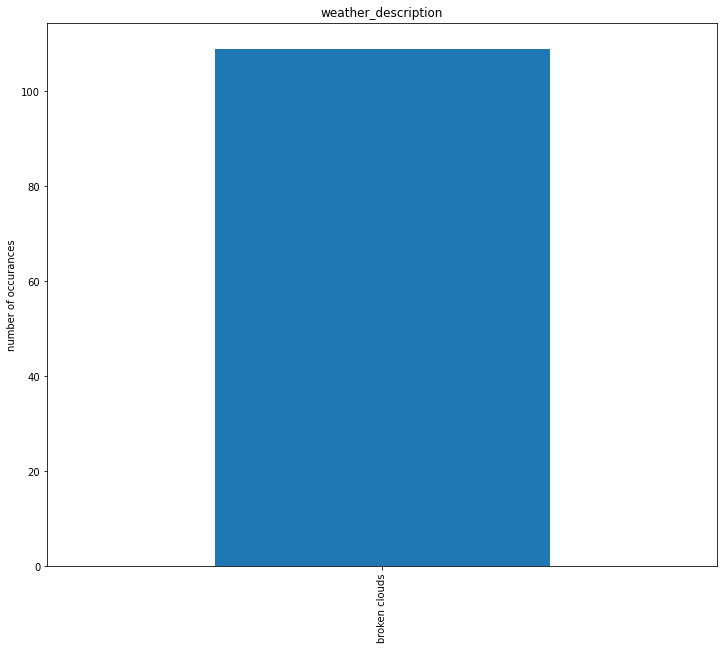

In [68]:
for col in categorical_columns:
    f = df[col].value_counts().plot(kind='bar', figsize=(12,10))
    plt.title(col)
    plt.ylabel('number of occurances')
    plt.show()

In [69]:
df.columns

Index(['station_number', 'time_queried', 'last_update', 'temp', 'feels_like',
       'pressure', 'humidity', 'visibility', 'wind_speed', 'wind_deg',
       'weather_main', 'weather_description'],
      dtype='object')

In [70]:
df[["temp", "feels_like", "station_number", "time_queried"]].sort_values("time_queried")[:50]

,temp,feels_like,station_number,time_queried
108,285,281,30,2021-03-20 14:19:33
107,285,281,42,2021-03-20 14:19:33
106,285,281,54,2021-03-20 14:19:33
103,285,281,6,2021-03-20 14:19:34
105,285,281,108,2021-03-20 14:19:34
104,285,281,56,2021-03-20 14:19:34
102,285,281,52,2021-03-20 14:19:35
101,285,281,18,2021-03-20 14:19:35
100,285,281,32,2021-03-20 14:19:35
94,285,281,106,2021-03-20 14:19:36
